In [7]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [8]:
ls

drive/  sample_data/


In [9]:
cd drive/My Drive/forex

/content/drive/My Drive/forex


In [10]:
ls

datasetone.csv  forex.ipynb


In [0]:
#LINEAR REGRESSION FOR FOREX

In [0]:
#DATA PREPROCESSING

In [12]:
import pandas as pd
data = pd.read_csv('/content/drive/My Drive/forex/datasetone.csv')
data.head()

,06-Sep-18,71.93,71.9,72.155,71.465,0.0024
0,05-Sep-18,71.755,71.405,71.955,71.375,0.0024
1,04-Sep-18,71.585,71.285,71.585,71.095,0.0052
2,03-Sep-18,71.215,70.790,71.220,70.725,0.0030
3,02-Sep-18,71.005,71.005,71.005,71.005,0.0000
4,31-Aug-18,71.005,70.955,71.025,70.855,0.0037


In [13]:
colnames=['DATE', 'PRICE', 'OPEN', 'HIGH', 'LOW', 'CHANGE']
data = pd.read_csv('/content/drive/My Drive/forex/datasetone.csv', names=colnames, header=None)
data.head()

,DATE,PRICE,OPEN,HIGH,LOW,CHANGE
0,06-Sep-18,71.930,71.900,72.155,71.465,0.0024
1,05-Sep-18,71.755,71.405,71.955,71.375,0.0024
2,04-Sep-18,71.585,71.285,71.585,71.095,0.0052
3,03-Sep-18,71.215,70.790,71.220,70.725,0.0030
4,02-Sep-18,71.005,71.005,71.005,71.005,0.0000


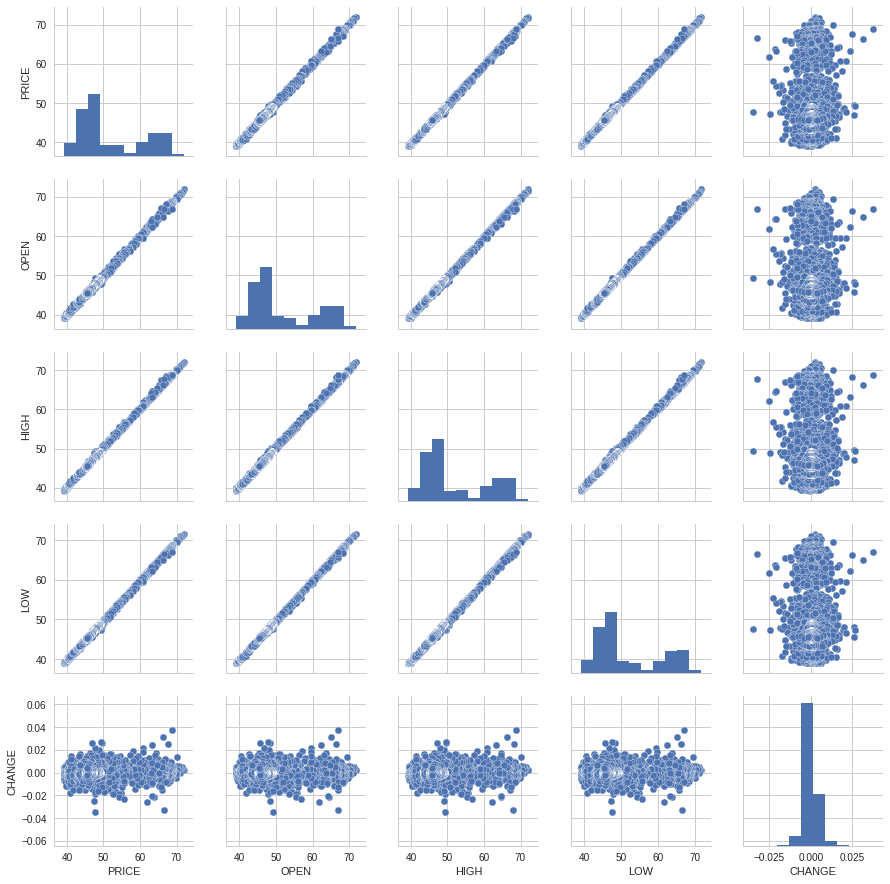

In [14]:
import matplotlib.pyplot as plt
import seaborn as sb
sb.set(style='whitegrid', context='notebook')
cols = ['PRICE', 'OPEN', 'HIGH', 'LOW', 'CHANGE']
sb.pairplot(data[cols], size=2.5);
plt.show()

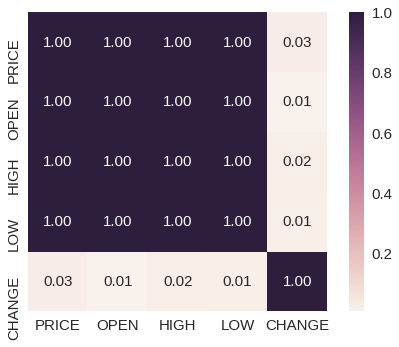

In [15]:
import numpy as np
cm = np.corrcoef(data[cols].values.T)
sb.set(font_scale=1.5)
hm = sb.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 15}, yticklabels=cols, xticklabels=cols)
plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:588: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  kde_data = remove_na(group_data)
/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:816: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  violin_data = remove_na(group_data)


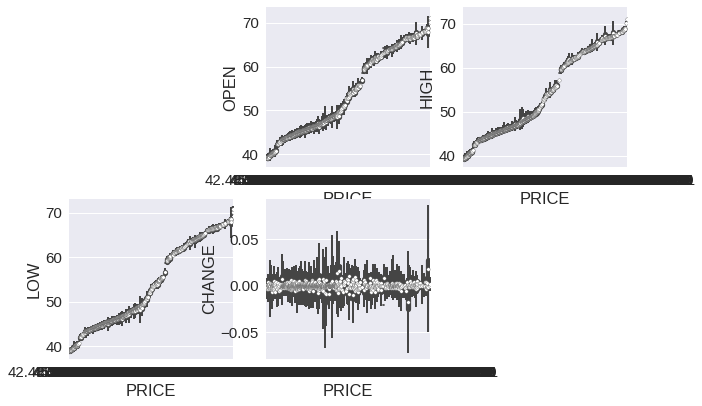

In [43]:
plt.figure(figsize=(10, 10))
cols =[ 'PRICE', 'OPEN', 'HIGH', 'LOW', 'CHANGE'] 
for column_index, column in enumerate(data[cols].columns):
    if column == 'PRICE':
        continue
    plt.subplot(3, 3, column_index + 1)
    sb.violinplot(x='PRICE', y=column, data=data[cols])

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


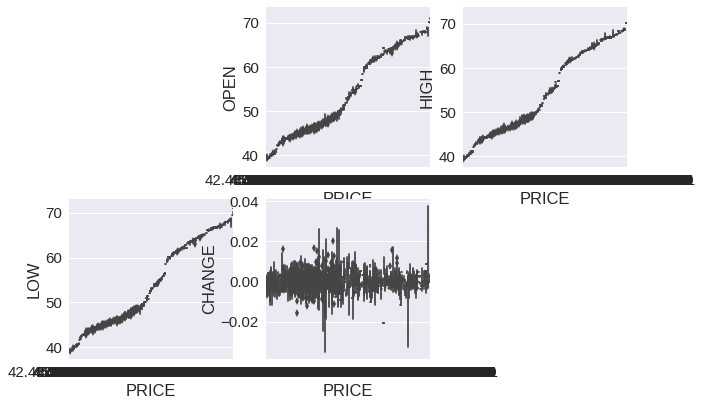

In [44]:
plt.figure(figsize=(10, 10))
for column_index, column in enumerate(data[cols].columns):
    if column == 'PRICE':
        continue
    plt.subplot(3, 3, column_index + 1)
    sb.boxplot(x='PRICE', y=column, data=data[cols])

In [0]:
#MULTIVARIATE REGRESSION MODEL

In [0]:
from sklearn import datasets, linear_model
from sklearn.linear_model import LinearRegression
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
import numpy as np
from scipy.special import expit
import sys

In [0]:
from sklearn.cross_validation import train_test_split
X = data.iloc[0:, [2,3,4,5]].values
X_train,X_test,Y_train,Y_test = train_test_split(X,data['PRICE'], test_size=0.3, random_state=0)

In [20]:
X

array([[ 7.1900e+01,  7.2155e+01,  7.1465e+01,  2.4000e-03],
       [ 7.1405e+01,  7.1955e+01,  7.1375e+01,  2.4000e-03],
       [ 7.1285e+01,  7.1585e+01,  7.1095e+01,  5.2000e-03],
       ...,
       [ 4.5765e+01,  4.5845e+01,  4.5485e+01, -1.9000e-03],
       [ 4.5580e+01,  4.5795e+01,  4.5550e+01,  3.2000e-03],
       [ 4.5425e+01,  4.5650e+01,  4.5375e+01,  3.7000e-03]])

In [21]:
X_train

array([[ 6.0090e+01,  6.0175e+01,  6.0080e+01,  0.0000e+00],
       [ 4.4475e+01,  4.4595e+01,  4.4305e+01, -3.4000e-03],
       [ 4.8565e+01,  4.8975e+01,  4.8055e+01,  5.0000e-04],
       ...,
       [ 5.5030e+01,  5.5220e+01,  5.4810e+01, -3.0000e-04],
       [ 4.9350e+01,  5.0040e+01,  4.9170e+01,  6.6000e-03],
       [ 4.2800e+01,  4.2910e+01,  4.2630e+01, -5.4000e-03]])

In [22]:
Y_train

1148    60.160
2112    44.365
2630    48.715
3900    45.570
3523    43.465
3210    46.540
3228    45.965
3477    43.505
953     62.348
3774    45.480
3565    43.590
1652    55.320
3416    44.905
3074    43.985
3170    45.785
2835    39.320
3872    45.370
2620    49.325
840     66.150
3634    44.175
3011    40.835
2882    39.195
3721    46.185
1445    53.810
2357    46.910
92      68.020
2920    40.500
3680    45.775
1606    54.265
2466    47.105
         ...  
544     67.075
4735    46.300
2745    41.565
3337    44.140
423     66.975
3219    46.660
659     66.558
797     64.954
755     66.025
2008    45.035
99      67.360
2496    49.905
1871    47.570
2046    45.135
2163    46.165
2893    39.240
537     66.706
1701    53.260
2897    39.140
2222    44.975
2135    46.285
2599    49.875
705     66.938
3468    43.485
4373    48.640
1033    61.795
3264    45.380
1653    55.040
2607    49.860
2732    42.640
Name: PRICE, Length: 3337, dtype: float64

In [23]:
regr = linear_model.LinearRegression()
regr.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [24]:
accuracy = regr.score(X_test,Y_test)
print(accuracy*100,'%')

99.99384576958543 %


In [0]:
x = [[45.2,41.2,46.4,0.0054]]

In [26]:
price_std = regr.predict(x)
print("PRICE: %.3f" %price_std)

PRICE: 44.232


In [0]:
#ENHANCED MODEL USING THE MULTILAYTER PRECEPTRON

In [28]:
X_train

array([[ 6.0090e+01,  6.0175e+01,  6.0080e+01,  0.0000e+00],
       [ 4.4475e+01,  4.4595e+01,  4.4305e+01, -3.4000e-03],
       [ 4.8565e+01,  4.8975e+01,  4.8055e+01,  5.0000e-04],
       ...,
       [ 5.5030e+01,  5.5220e+01,  5.4810e+01, -3.0000e-04],
       [ 4.9350e+01,  5.0040e+01,  4.9170e+01,  6.6000e-03],
       [ 4.2800e+01,  4.2910e+01,  4.2630e+01, -5.4000e-03]])

In [29]:
Y_train

1148    60.160
2112    44.365
2630    48.715
3900    45.570
3523    43.465
3210    46.540
3228    45.965
3477    43.505
953     62.348
3774    45.480
3565    43.590
1652    55.320
3416    44.905
3074    43.985
3170    45.785
2835    39.320
3872    45.370
2620    49.325
840     66.150
3634    44.175
3011    40.835
2882    39.195
3721    46.185
1445    53.810
2357    46.910
92      68.020
2920    40.500
3680    45.775
1606    54.265
2466    47.105
         ...  
544     67.075
4735    46.300
2745    41.565
3337    44.140
423     66.975
3219    46.660
659     66.558
797     64.954
755     66.025
2008    45.035
99      67.360
2496    49.905
1871    47.570
2046    45.135
2163    46.165
2893    39.240
537     66.706
1701    53.260
2897    39.140
2222    44.975
2135    46.285
2599    49.875
705     66.938
3468    43.485
4373    48.640
1033    61.795
3264    45.380
1653    55.040
2607    49.860
2732    42.640
Name: PRICE, Length: 3337, dtype: float64

In [0]:
from sklearn import svm

In [0]:
model = svm.SVC(kernel='linear', C=1, gamma=1)

In [0]:
import numpy as np
from sklearn import linear_model
from sklearn import svm

classifiers = [
    svm.SVR()]
    #,
    #linear_model.SGDRegressor(),
    #linear_model.BayesianRidge(),
    #linear_model.LassoLars(),
    #linear_model.ARDRegression(),
    #linear_model.PassiveAggressiveRegressor(),
    #linear_model.TheilSenRegressor(),
    #linear_model.LinearRegression()]

In [35]:
for item in classifiers:
    print(item)
    clf = item
    clf.fit(X_train, Y_train)
    print(clf.predict(X_test),'\n')

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)
[66.68002321 66.68774718 47.03002575 ... 65.52781118 43.7127884
 46.71721694] 



In [0]:
accuracy = clf.score(X_train, Y_train)

In [0]:
score = accuracy*100

In [47]:
score

99.84077999439832